In [1]:
import os
import json
import pandas as pd
from tqdm import tqdm
from ast import literal_eval

from dotenv import find_dotenv, load_dotenv
_ = load_dotenv(find_dotenv())

from llama_index.llms.openai import OpenAI
from llama_index.core.prompts import PromptTemplate

from utils import json_load

In [2]:
# load llm response
response_dir = os.path.join('data', 'source')
#response_file_path = os.path.join(response_dir, 'baseline_rag_result_R3.json')
response_file_path = os.path.join(response_dir, 'baseline_rag_result.json')
response = json_load(response_file_path)
response_df = pd.DataFrame(response)
response_df
#df = pd.merge(df, response_df, how='left', on='query')
#df['reference_contexts'] = df['reference_contexts'].apply(literal_eval)

#df.head(3)

load data from: data/source/baseline_rag_result.json


,query,response,retrieved_nodes,reranked_nodes
0,這門課希望學生從使用者變成什麼？,這門課希望學生從使用者變成理解者，甚至是創造者。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'eba16e20-d000-4b3e-b05a-b1589f6b9fe9'...
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用Google的VO3。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'c9b0c2ac-d7b7-4183-9bcd-6c3d57686b61'...
2,哪個軟體被用來合成講師的聲音？,Eleven Labs這個軟體被用來合成講師的聲音。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'c9b0c2ac-d7b7-4183-9bcd-6c3d57686b61'...
3,這門課的上課時間是週五下午幾點幾分開始？,這門課的上課時間是週五下午2點20分開始。,[{'id': 'f1b8dce2-5b45-4ed8-b44d-0bf6e2306877'...,[{'id': 'f0e22525-58ae-443d-8c9f-024c8a93b944'...
4,前兩個作業的截止日期延後到哪一天繳交？,前兩個作業的截止日期延後到10月17號繳交。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'f1b8dce2-5b45-4ed8-b44d-0bf6e2306877'...
5,助教預計在幾月幾號把成績送出？,助教預計在1月12號把成績送出。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'f1b8dce2-5b45-4ed8-b44d-0bf6e2306877'...
6,課程中目前保留需要訓練多少時間的作業？,課程中保留需要訓練模型的作業，這些作業通常需要特別花時間，可能長達三到四個小時才能完成。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'cb9fc3f6-be14-46c2-a608-03a6bfd9d99d'...
7,如果你對生成式AI一無所知，建議先看哪一門課程？,建議先看生成式AI導論2024的課程。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': '8c34bf19-2fb0-4755-8b8b-86746a99481a'...


In [3]:
df = response_df.copy()

In [4]:
pipeline_name = os.path.splitext(os.path.basename(response_file_path))[0]
print(pipeline_name)
save_dir = os.path.join('data', 'temp')
os.makedirs(save_dir, exist_ok=True)
save_file_path = os.path.join(save_dir, f"{pipeline_name}_context_relevancy.csv")
print('write result to:' + save_file_path)

baseline_rag_result
write result to:data/temp/baseline_rag_result_context_relevancy.csv


In [5]:
from llama_index.core.evaluation import (
    AnswerRelevancyEvaluator,
    ContextRelevancyEvaluator,
)

In [6]:
llm = OpenAI(model="gpt-5-mini", temperature=0, is_streaming=False)

In [7]:
evaluator = ContextRelevancyEvaluator(llm)

In [8]:
for idx, row in tqdm(df.iterrows(), total=len(df)):
    break

  0%|                                                                                             | 0/8 [00:00<?, ?it/s]


In [9]:
row.query

'這門課希望學生從使用者變成什麼？'

In [10]:
evaluator.evaluate?

Signature:
evaluator.evaluate(
    query: Optional[str] = None,
    response: Optional[str] = None,
    contexts: Optional[Sequence[str]] = None,
    **kwargs: Any,
) -> llama_index.core.evaluation.base.EvaluationResult
Docstring:
Run evaluation with query string, retrieved contexts,
and generated response string.

Subclasses can override this method to provide custom evaluation logic and
take in additional arguments.
File:      ~/miniconda3/envs/rag30/lib/python3.12/site-packages/llama_index/core/evaluation/base.py
Type:      method

In [11]:
def get_context(nodes):
    context = []
    for node in nodes:
        context.append(node['text'])
    return context
    

In [12]:
context = get_context(row.retrieved_nodes)

result = evaluator.evaluate(query=row.query, contexts=context)
result

/home/poyuan/miniconda3/envs/rag30/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


EvaluationResult(query='這門課希望學生從使用者變成什麼？', contexts=['Cool上留言區的問題\n那旁聽生\n如果你想要加入NTU Cool的話\n請直接寄信給助教\n只要你寄信給助教說你要旁聽\n我們都可以把你加入NTU Cool\n那怎麼找到NTU Cool上面的留言區呢\n假設你已經有選上這門課的話\n那你就已經在NTU Cool裡面\n那你在NTU Cool裡面點討論\n然後你就可以看到9月12號上課\n即時討論區這一個區域\n然後你可以把你的問題留在這個地方\n如果我有時間的話\n會優先回答在討論區裡面的問題\n那另外一個很重要的訊息要跟大家講的就是\n因為呢\n網路不是非常的穩定\n所以直播是有可能斷線的\n我們剛才測試的時候\n其實直播就斷線了好幾次\n那直播斷線有可能造成的問題就是\n你可能會沒有辦法用同一個連結\n再繼續看直播\n所以假設我們遇到斷線的狀況\n接下來我們的操作是\n會開一個新的直播連結\n然後透過NTU Cool寄給所有有修課的同學\n但是假設你發現直播斷線\n非常重要的一點就是\n請勿驚慌 請勿驚慌', 'Cool寄給所有有修課的同學\n但是假設你發現直播斷線\n非常重要的一點就是\n請勿驚慌 請勿驚慌 請勿驚慌\n所有的課程統統都有錄影\n所以直播斷線你就去做別的事情\n反正所有的課程都是有錄影的\n好接下來呢\n我們講一下作業的規劃\n我們這門課總共有十講\n每一講都有一個對應的作業\n那我把每一個作業的公告日期\n還有截止日期都放在投影片上面\n那基本上的每一個作業呢\n都是留給大家三週的時間來完成\n那唯一例外的呢\n是前兩個作業\n前兩個作業呢\n我們特別把它的截止日期延後\n延後到10月17號繳交\n因為我知道說這門課\n是很多不同學校的學生一起選修\n那每一個學校加退選的時間都不一樣\n所以大家加選到這門課的時間是不一樣的\n所以前面幾個作業的日期延後\n讓大家比較有時間可以完成\n前面幾個作業\n那另外一個要注意的事情就是\n我們最後一個作業\n作業時的截止日期是明年的1月9號\n那我們要收到所有的作業以後\n才能夠送出成績\n所以送出成績的時間\n一定是在1月9號之後\n那我們目前預計1月12號把成績送出\n那如果你有合理的理由\n需要提早知道成績\n那你可以跟助教講\n因為我

In [13]:
result.feedback

'1) 是否符合使用者問題的主題？\n評分：2/2\n理由：上下文中明確討論課程目標，包含直接回答句「簡單來說 我們要從使用者變成理解者 甚至是創造者」，完全對應到問題「這門課希望學生從使用者變成什麼？」因此與查詢主題高度符合。\n\n2) 是否能僅靠檢索到的內容就完整回答查詢？\n評分：2/2\n理由：檢索內容已明確且直接給出答案（「理解者」「甚至是創造者」），不需額外資料即可完整回覆查詢。上下文亦提供前後說明，強化該結論的語境與意圖。\n\n總結建議回覆（可直接用於回答查詢）：\n這門課希望學生「從使用者變成理解者，甚至是創造者」。\n\n[RESULT] 4.0'

In [14]:
result.score

1.0

In [15]:
context_score = []
context_feedback = []
for idx, row in tqdm(df.iterrows(), total=len(df)):
    nodes = row.retrieved_nodes
    context = get_context(nodes)
    query = row.query
    result = evaluator.evaluate(
        query=query,
        contexts=context,
    )

    context_score.append(result.score)
    context_feedback.append(result.feedback)

df['context_score'] = context_score
df['context_feedback'] = context_feedback
df.to_csv(save_file_path, index=False)

100%|█████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:54<00:00, 14.36s/it]


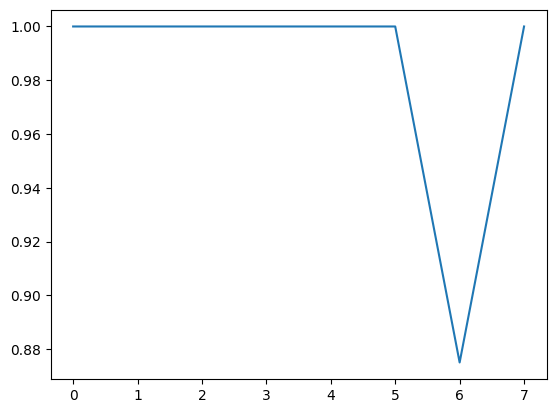

In [16]:
import matplotlib.pyplot as plt

plt.plot(context_score)